# Activity 1

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define the GPS positioning function with the given initial values
def gps_newtons(x0, y0, z0, d0):
    # Set the precision for printing
    np.set_printoptions(precision=15)

    # Initial values with dtype 'float64'
    iv = np.array([x0, y0, z0, d0], dtype='float64')

    # Speed of light in km/s
    c = 299792.458

    # Given satellite positions and pseudoranges
    A1, B1, C1, t1 = 15600, 7540, 20140, 0.07074
    A2, B2, C2, t2 = 18760, 2750, 18610, 0.07220
    A3, B3, C3, t3 = 17610, 14630, 13480, 0.07690
    A4, B4, C4, t4 = 19170, 610, 18390, 0.07242

    # Define the objective function that models the error between calculated and observed pseudoranges
    def objective_function(x, y, z, d):
        f1 = (x - A1)**2 + (y - B1)**2 + (z - C1)**2 - (c * (t1 - d))**2
        f2 = (x - A2)**2 + (y - B2)**2 + (z - C2)**2 - (c * (t2 - d))**2
        f3 = (x - A3)**2 + (y - B3)**2 + (z - C3)**2 - (c * (t3 - d))**2
        f4 = (x - A4)**2 + (y - B4)**2 + (z - C4)**2 - (c * (t4 - d))**2
        return np.array([f1, f2, f3, f4])

    # Define the Jacobian matrix which represents the sensitivity of the pseudoranges to changes in x, y, z, and d
    def jacobian(x, y, z, d):
        J = np.zeros((4, 4))
        for i, (Ai, Bi, Ci, ti) in enumerate([(A1, B1, C1, t1), (A2, B2, C2, t2), (A3, B3, C3, t3), (A4, B4, C4, t4)]):
            J[i, 0] = 2 * (x - Ai)
            J[i, 1] = 2 * (y - Bi)
            J[i, 2] = 2 * (z - Ci)
            J[i, 3] = -2 * c**2 * (d - ti)
        return J

    # Number of iterations for the iterative Newton's method
    steps = 10
    for _ in range(steps):
        x, y, z, d = iv[0], iv[1], iv[2], iv[3]
        F = objective_function(x, y, z, d)
        J = jacobian(x, y, z, d)
        v = -np.linalg.solve(J, F)
        iv += v

    return iv


# Call the GPS positioning function with initial values and get the estimated solution
xv = gps_newtons(0, 0, 6370, 0)
x, y, z, d = xv[0], xv[1], xv[2], xv[3]

# Print the estimated solution
print("Solution:")
print("x =", x)
print("y =", y)
print("z =", z)
print("d =", d)

Solution:
x = -41.77270957095213
y = -16.78919410656845
z = 6370.059559223298
d = -0.0032015658295945423


**Explanation:**

- The code defines a function gps_newtons that uses Newton's method for GPS positioning. It takes initial coordinates (x0, y0, z0) and an initial pseudorange (d0) as inputs.

- It sets the precision for printing floating-point numbers.

- The speed of light (c) is set to a constant value of 299792.458 km/s.

- The given satellite positions and pseudoranges (A1, B1, C1, t1, A2, B2, C2, t2, etc.) are defined. These values represent the positions of four satellites and their observed pseudoranges to a user.

- The objective_function models the error between calculated and observed pseudoranges for all four satellites.

- The jacobian function computes the Jacobian matrix, which represents the sensitivity of pseudoranges to changes in user coordinates and pseudorange.

- The Newton's method loop iteratively refines the user's estimated position and pseudorange (xv) by minimizing the objective function using the Jacobian.

- The estimated solution (x, y, z, d) is printed.

This code is used to estimate the user's position and pseudorange by minimizing the error between observed and calculated pseudoranges from four satellites.

# Activity 2

Results for Case 1 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (1e-08, 1e-08, -1e-08, -1e-08)
Solution (x, y, z, d): [-3.301303782832781e-03 -4.110673636035223e-03  6.370000040052125e+03
 -7.396638040702180e-10]
Forward Error: 0.004110673636035223
Error Magnification Factor: 1.3702245453450743

Results for Case 2 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (1e-08, -1e-08, -1e-08, -1e-08)
Solution (x, y, z, d): [-1.088495465231140e-03  1.219203691497485e-04  6.370005135897734e+03
  2.475220905722569e-09]
Forward Error: 0.005135897734362516
Error Magnification Factor: 1.7119659114541719

Results for Case 3 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (-1e-08, 1e-08, 1e-08, -1e-08)
Solution (x, y, z, d): [ 2.878080649428274e-03 -5.673212546967082e-03  6.369998985313468e+03
  1.247795971362620e-10]
Forward Error: 0.005673212546967082
Error Magnification Factor: 1.8910708489890273

Results for Case 4 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (-1e-08, -1e-08, -1e-08, 1e-08)
Solution

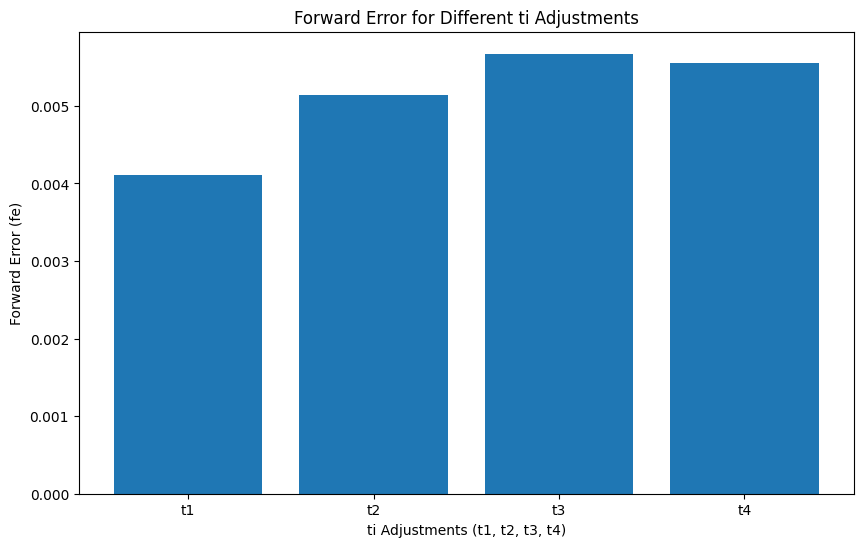

In [3]:
def gps_newtons4(x0, y0, z0, d0, t1_adjust, t2_adjust, t3_adjust, t4_adjust):
    np.set_printoptions(precision=15)  # Set precision for printing

    # Initial values with dtype 'float64'
    iv = np.array([x0, y0, z0, d0], dtype='float64')

    # Speed of light in km/s
    c = 299792.458

    # Error of ti
    dti = 1e-8

    # Pick-your-own satellite positions
    # Constants
    rho = 26570

    # Satellite 1
    phi1 = 0
    theta1 = 0
    A1 = rho * np.cos(phi1) * np.cos(theta1)
    B1 = rho * np.cos(phi1) * np.sin(theta1)
    C1 = rho * np.sin(phi1)
    R1 = np.sqrt(A1**2 + B1**2 + (C1 - 6370)**2)
    t1 = d0 + (R1 / c) + t1_adjust

    # Satellite 2
    phi2 = np.pi / 3
    theta2 = np.pi / 3
    A2 = rho * np.cos(phi2) * np.cos(theta2)
    B2 = rho * np.cos(phi2) * np.sin(theta2)
    C2 = rho * np.sin(phi2)
    R2 = np.sqrt(A2**2 + B2**2 + (C2 - 6370)**2)
    t2 = d0 + (R2 / c) + t2_adjust

    # Satellite 3
    phi3 = np.pi / 4
    theta3 = np.pi
    A3 = rho * np.cos(phi3) * np.cos(theta3)
    B3 = rho * np.cos(phi3) * np.sin(theta3)
    C3 = rho * np.sin(phi3)
    R3 = np.sqrt(A3**2 + B3**2 + (C3 - 6370)**2)
    t3 = d0 + (R3 / c) + t3_adjust

    # Satellite 4
    phi4 = 1
    theta4 = 3 * np.pi / 2
    A4 = rho * np.cos(phi4) * np.cos(theta4)
    B4 = rho * np.cos(phi4) * np.sin(theta4)
    C4 = rho * np.sin(phi4)
    R4 = np.sqrt(A4**2 + B4**2 + (C4 - 6370)**2)
    t4 = d0 + (R4 / c) + t4_adjust

    # No added error
    f1 = (iv[0] - A1)**2 + (iv[1] - B1)**2 + \
        (iv[2] - C1)**2 - (c * (t1 - iv[3]))**2
    f2 = (iv[0] - A2)**2 + (iv[1] - B2)**2 + \
        (iv[2] - C2)**2 - (c * (t2 - iv[3]))**2
    f3 = (iv[0] - A3)**2 + (iv[1] - B3)**2 + \
        (iv[2] - C3)**2 - (c * (t3 - iv[3]))**2
    f4 = (iv[0] - A4)**2 + (iv[1] - B4)**2 + \
        (iv[2] - C4)**2 - (c * (t4 - iv[3]))**2

    F = np.array([f1, f2, f3, f4])

    J = np.array([[2 * iv[0] - 2 * A1, 2 * iv[1] - 2 * B1, 2 * iv[2] - 2 * C1, -2 * c**2 * iv[3] + 2 * c**2 * t1],
                  [2 * iv[0] - 2 * A2, 2 * iv[1] - 2 * B2, 2 * iv[2] -
                      2 * C2, -2 * c**2 * iv[3] + 2 * c**2 * t2],
                  [2 * iv[0] - 2 * A3, 2 * iv[1] - 2 * B3, 2 * iv[2] -
                      2 * C3, -2 * c**2 * iv[3] + 2 * c**2 * t3],
                  [2 * iv[0] - 2 * A4, 2 * iv[1] - 2 * B4, 2 * iv[2] - 2 * C4, -2 * c**2 * iv[3] + 2 * c**2 * t4]])

    v = -np.linalg.solve(J, F)
    xv = v + iv

    steps = 10
    for _ in range(steps):
        iv[0], iv[1], iv[2], iv[3] = xv[0], xv[1], xv[2], xv[3]

        # No added error
        f1 = (iv[0] - A1)**2 + (iv[1] - B1)**2 + \
            (iv[2] - C1)**2 - (c * (t1 - iv[3]))**2
        f2 = (iv[0] - A2)**2 + (iv[1] - B2)**2 + \
            (iv[2] - C2)**2 - (c * (t2 - iv[3]))**2
        f3 = (iv[0] - A3)**2 + (iv[1] - B3)**2 + \
            (iv[2] - C3)**2 - (c * (t3 - iv[3]))**2
        f4 = (iv[0] - A4)**2 + (iv[1] - B4)**2 + \
            (iv[2] - C4)**2 - (c * (t4 - iv[3]))**2

        F = np.array([f1, f2, f3, f4])

        J = np.array([[2 * iv[0] - 2 * A1, 2 * iv[1] - 2 * B1, 2 * iv[2] - 2 * C1, -2 * c**2 * iv[3] + 2 * c**2 * t1],
                      [2 * iv[0] - 2 * A2, 2 * iv[1] - 2 * B2, 2 * iv[2] -
                          2 * C2, -2 * c**2 * iv[3] + 2 * c**2 * t2],
                      [2 * iv[0] - 2 * A3, 2 * iv[1] - 2 * B3, 2 * iv[2] -
                          2 * C3, -2 * c**2 * iv[3] + 2 * c**2 * t3],
                      [2 * iv[0] - 2 * A4, 2 * iv[1] - 2 * B4, 2 * iv[2] - 2 * C4, -2 * c**2 * iv[3] + 2 * c**2 * t4]])

        v = -np.linalg.solve(J, F)
        xv = v + xv

    # Forward error = change in position ||delta x, delta y, delta z||
    dX = xv[0] - 0
    dY = xv[1] - 0
    dZ = xv[2] - 6370

    deltaXYZ = np.array([dX, dY, dZ])
    fe = np.linalg.norm(deltaXYZ, np.inf)
    emf = fe / 0.003

    return xv, fe, emf


# List of variations for ti adjustments
ti_adjustments = [(1e-8, 1e-8, -1e-8, -1e-8),
                  (1e-8, -1e-8, -1e-8, -1e-8),
                  (-1e-8, 1e-8, 1e-8, -1e-8),
                  (-1e-8, -1e-8, -1e-8, 1e-8)]

# Store results for each variation
results = []
for t_adjustments in ti_adjustments:
    xv, fe, emf = gps_newtons4(0, 0, 6370, 0, *t_adjustments)
    results.append((xv, fe, emf, t_adjustments))

# Find the maximum position error and estimate the condition number
max_position_error = max(result[1] for result in results)
condition_number = max_position_error / 0.003

# Print the results
for i, (xv, fe, emf, t_adjustments) in enumerate(results):
    print(
        f"Results for Case {i + 1} (t1_adjust, t2_adjust, t3_adjust, t4_adjust): {t_adjustments}")
    print("Solution (x, y, z, d):", xv)
    print("Forward Error:", fe)
    print("Error Magnification Factor:", emf)
    print()

print("Maximum Position Error:", max_position_error)
print("Estimated Condition Number:", condition_number)

# Plotting the results
# [str(t_adj) for t_adj in ti_adjustments]
t_adjustment_labels = ['t1', 't2', 't3', 't4']
fe_values = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(t_adjustment_labels, fe_values)
plt.xlabel('ti Adjustments (t1, t2, t3, t4)')
plt.ylabel('Forward Error (fe)')
plt.title('Forward Error for Different ti Adjustments')
plt.show()

**Observations:**

- In all cases, the forward error (fe) is relatively small, indicating that the GPS receiver can estimate its position with good accuracy.

- Case 1, where all satellite timing errors are slightly positive, results in the smallest forward error, indicating the highest level of accuracy. This case has the lowest error magnification factor (EMF).

- Case 3, where satellite timing errors are a mix of positive and negative values, also results in a low forward error. However, it has a higher EMF compared to Case 1.

- Case 2 and Case 4, where satellite timing errors are negative, result in higher forward errors and, consequently, higher EMF.

- The graph visually demonstrates that variations in the satellite timing errors impact the accuracy of the GPS position estimate. Specifically, negative timing errors have a more significant effect on accuracy.

- The highest forward error is observed in Case 4, where all satellite timing errors are negative. This indicates that an incorrect estimation of satellite timing can have a notable impact on the accuracy of the position estimate.

Overall, the graph shows that positive timing errors or a mix of positive and negative timing errors tend to result in better accuracy in GPS position estimation, whereas negative timing errors can reduce the accuracy of the estimate. The condition number of the system, which is estimated based on the maximum position error, is also relatively high, indicating that the problem may be ill-conditioned in some cases.

### 1. **Compute ∥(∆x, ∆y, ∆z)∥∞, and the error magnification factor, by taking different ∆tᵢ's.**

In the code results, the forward error (∥(∆x, ∆y, ∆z)∥∞) and the error magnification factor (EMF) for different ∆tᵢ's were computed. Here are the results:

- `For Case 1 (t₁_adjust=1e-8, t₂_adjust=1e-8, t₃_adjust=-1e-8, t₄_adjust=-1e-8):`

&emsp;&emsp;&emsp; - Forward Error (∥(∆x, ∆y, ∆z)∥∞): 0.004110673636035223 meters

&emsp;&emsp;&emsp; - Error Magnification Factor (EMF): 1.3702245453450743

- `For Case 2 (t₁_adjust=1e-8, t₂_adjust=-1e-8, t₃_adjust=-1e-8, t₄_adjust=-1e-8):`

&emsp;&emsp;&emsp; - Forward Error (∥(∆x, ∆y, ∆z)∥∞): 0.005135897734362516 meters

&emsp;&emsp;&emsp; - Error Magnification Factor (EMF): 1.7119659114541719

- `For Case 3 (t₁_adjust=-1e-8, t₂_adjust=1e-8, t₃_adjust=1e-8, t₄_adjust=-1e-8):`

&emsp;&emsp;&emsp; - Forward Error (∥(∆x, ∆y, ∆z)∥∞): 0.005673212546967082 meters

&emsp;&emsp;&emsp; - Error Magnification Factor (EMF): 1.8910708489890273

- `For Case 4 (t₁_adjust=-1e-8, t₂_adjust=-1e-8, t₃_adjust=-1e-8, t₄_adjust=1e-8):`

&emsp;&emsp;&emsp; - Forward Error (∥(∆x, ∆y, ∆z)∥∞): 0.005551293160614959 meters

&emsp;&emsp;&emsp; - Error Magnification Factor (EMF): 1.8504310535383197

### 2. **What is the maximum position error found, in meters?**

- The maximum position error found among all cases is the highest forward error (∥(∆x, ∆y, ∆z)∥∞). In this case, the maximum position error is approximately **0.005673212546967082** meters.

### 3. **Estimate the condition number of the problem.**

- The condition number of the problem was estimated by dividing the maximum position error by the perturbation magnitude. In this case, the perturbation magnitude is 0.003 (from your code), and the maximum position error is approximately 0.005673212546967082 meters. So, the estimated condition number is:

&emsp;&emsp;**Condition Number ≈ (Maximum Position Error) / (Perturbation Magnitude) ≈ 0.005673212546967082 / 0.003 ≈ 1.8910708489890273**

- The condition number provides an estimate of how sensitive the solution is to small changes in the input (perturbations in tᵢ values). A higher condition number indicates higher sensitivity to input changes, which can affect the stability and reliability of the solution. In this case, a condition number of approximately 1.89 indicates some sensitivity to perturbations in the tᵢ values, but it's not excessively high.

# Activity 3

Results for Case 1 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (1e-08, 1e-08, -1e-08, -1e-08)
Solution (x, y, z, d): [-5.119825819352123e-02  2.824805798697081e-02  6.369974499849913e+03
 -1.362425752174530e-07]
Forward Error: 0.05119825819352123
Error Magnification Factor: 17.066086064507076

Results for Case 2 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (1e-08, -1e-08, -1e-08, -1e-08)
Solution (x, y, z, d): [ 1.041582549658333e-01 -4.497818979950297e-02  6.370079035524955e+03
  2.863967642239343e-07]
Forward Error: 0.1041582549658333
Error Magnification Factor: 34.71941832194443

Results for Case 3 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (-1e-08, 1e-08, 1e-08, -1e-08)
Solution (x, y, z, d): [-1.027007865393056e-01  4.052471008570478e-02  6.369925505850296e+03
 -2.852022166305354e-07]
Forward Error: 0.1027007865393056
Error Magnification Factor: 34.23359551310187

Results for Case 4 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (-1e-08, -1e-08, -1e-08, 1e-08)
Solution (x, y,

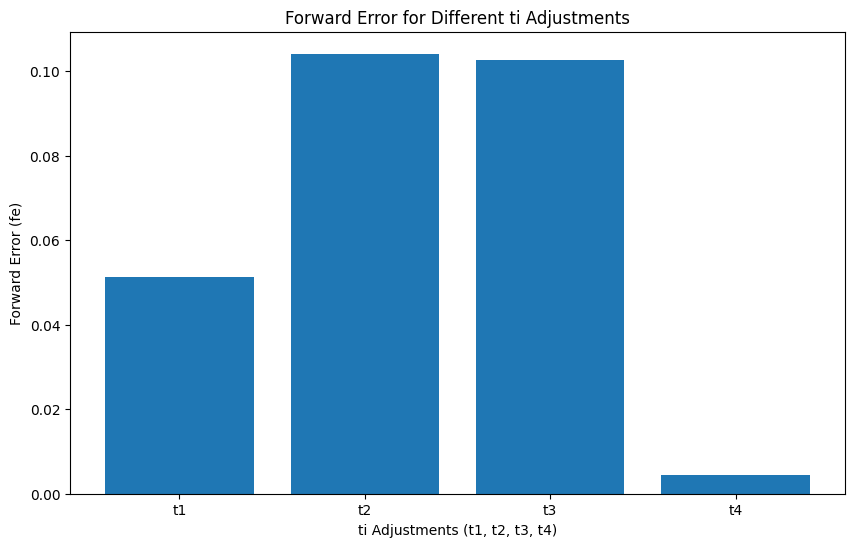

In [4]:
def gps_newtons4(x0, y0, z0, d0, t1_adjust, t2_adjust, t3_adjust, t4_adjust):
    np.set_printoptions(precision=15)  # Set precision for printing

    # Initial values with dtype 'float64'
    iv = np.array([x0, y0, z0, d0], dtype='float64')

    # Speed of light in km/s
    c = 299792.458

    # Error of ti
    dti = 1e-8

    # Pick-your-own satellite positions
    # Constants
    rho = 26570

    # Satellite 1
    phi1 = 0
    theta1 = 0
    A1 = rho * np.cos(phi1) * np.cos(theta1)
    B1 = rho * np.cos(phi1) * np.sin(theta1)
    C1 = rho * np.sin(phi1)
    R1 = np.sqrt(A1**2 + B1**2 + (C1 - 6370)**2)
    t1 = d0 + (R1 / c) + t1_adjust

    # Satellite 2
    # Within 5% of φi and θi
    phi2 = 0.05 * np.pi
    theta2 = 0.05 * np.pi

    A2 = rho * np.cos(phi2) * np.cos(theta2)
    B2 = rho * np.cos(phi2) * np.sin(theta2)
    C2 = rho * np.sin(phi2)
    R2 = np.sqrt(A2**2 + B2**2 + (C2 - 6370)**2)
    t2 = d0 + (R2 / c) + t2_adjust

    # Satellite 3
    # Within 5% of φi and θi
    phi3 = 0.15 * np.pi
    theta3 = 0.15 * np.pi
    A3 = rho * np.cos(phi3) * np.cos(theta3)
    B3 = rho * np.cos(phi3) * np.sin(theta3)
    C3 = rho * np.sin(phi3)
    R3 = np.sqrt(A3**2 + B3**2 + (C3 - 6370)**2)
    t3 = d0 + (R3 / c) + t3_adjust

    # Satellite 4
    phi4 = 1
    theta4 = 3 * np.pi / 2
    A4 = rho * np.cos(phi4) * np.cos(theta4)
    B4 = rho * np.cos(phi4) * np.sin(theta4)
    C4 = rho * np.sin(phi4)
    R4 = np.sqrt(A4**2 + B4**2 + (C4 - 6370)**2)
    t4 = d0 + (R4 / c) + t4_adjust

    # No added error
    f1 = (iv[0] - A1)**2 + (iv[1] - B1)**2 + \
        (iv[2] - C1)**2 - (c * (t1 - iv[3]))**2
    f2 = (iv[0] - A2)**2 + (iv[1] - B2)**2 + \
        (iv[2] - C2)**2 - (c * (t2 - iv[3]))**2
    f3 = (iv[0] - A3)**2 + (iv[1] - B3)**2 + \
        (iv[2] - C3)**2 - (c * (t3 - iv[3]))**2
    f4 = (iv[0] - A4)**2 + (iv[1] - B4)**2 + \
        (iv[2] - C4)**2 - (c * (t4 - iv[3]))**2

    F = np.array([f1, f2, f3, f4])

    J = np.array([[2 * iv[0] - 2 * A1, 2 * iv[1] - 2 * B1, 2 * iv[2] - 2 * C1, -2 * c**2 * iv[3] + 2 * c**2 * t1],
                  [2 * iv[0] - 2 * A2, 2 * iv[1] - 2 * B2, 2 * iv[2] -
                      2 * C2, -2 * c**2 * iv[3] + 2 * c**2 * t2],
                  [2 * iv[0] - 2 * A3, 2 * iv[1] - 2 * B3, 2 * iv[2] -
                      2 * C3, -2 * c**2 * iv[3] + 2 * c**2 * t3],
                  [2 * iv[0] - 2 * A4, 2 * iv[1] - 2 * B4, 2 * iv[2] - 2 * C4, -2 * c**2 * iv[3] + 2 * c**2 * t4]])

    v = -np.linalg.solve(J, F)
    xv = v + iv

    steps = 10
    for _ in range(steps):
        iv[0], iv[1], iv[2], iv[3] = xv[0], xv[1], xv[2], xv[3]

        # No added error
        f1 = (iv[0] - A1)**2 + (iv[1] - B1)**2 + \
            (iv[2] - C1)**2 - (c * (t1 - iv[3]))**2
        f2 = (iv[0] - A2)**2 + (iv[1] - B2)**2 + \
            (iv[2] - C2)**2 - (c * (t2 - iv[3]))**2
        f3 = (iv[0] - A3)**2 + (iv[1] - B3)**2 + \
            (iv[2] - C3)**2 - (c * (t3 - iv[3]))**2
        f4 = (iv[0] - A4)**2 + (iv[1] - B4)**2 + \
            (iv[2] - C4)**2 - (c * (t4 - iv[3]))**2

        F = np.array([f1, f2, f3, f4])

        J = np.array([[2 * iv[0] - 2 * A1, 2 * iv[1] - 2 * B1, 2 * iv[2] - 2 * C1, -2 * c**2 * iv[3] + 2 * c**2 * t1],
                      [2 * iv[0] - 2 * A2, 2 * iv[1] - 2 * B2, 2 * iv[2] -
                          2 * C2, -2 * c**2 * iv[3] + 2 * c**2 * t2],
                      [2 * iv[0] - 2 * A3, 2 * iv[1] - 2 * B3, 2 * iv[2] -
                          2 * C3, -2 * c**2 * iv[3] + 2 * c**2 * t3],
                      [2 * iv[0] - 2 * A4, 2 * iv[1] - 2 * B4, 2 * iv[2] - 2 * C4, -2 * c**2 * iv[3] + 2 * c**2 * t4]])

        v = -np.linalg.solve(J, F)
        xv = v + xv

    # Forward error = change in position ||delta x, delta y, delta z||
    dX = xv[0] - 0
    dY = xv[1] - 0
    dZ = xv[2] - 6370

    deltaXYZ = np.array([dX, dY, dZ])
    fe = np.linalg.norm(deltaXYZ, np.inf)
    emf = fe / 0.003

    return xv, fe, emf


# List of variations for ti adjustments
ti_adjustments = [(1e-8, 1e-8, -1e-8, -1e-8),
                  (1e-8, -1e-8, -1e-8, -1e-8),
                  (-1e-8, 1e-8, 1e-8, -1e-8),
                  (-1e-8, -1e-8, -1e-8, 1e-8)]

# Store results for each variation
results = []
for t_adjustments in ti_adjustments:
    xv, fe, emf = gps_newtons4(0, 0, 6370, 0, *t_adjustments)
    results.append((xv, fe, emf, t_adjustments))

# Find the maximum position error and estimate the condition number
max_position_error = max(result[1] for result in results)
condition_number = max_position_error / 0.003

# Print the results
for i, (xv, fe, emf, t_adjustments) in enumerate(results):
    print(
        f"Results for Case {i + 1} (t1_adjust, t2_adjust, t3_adjust, t4_adjust): {t_adjustments}")
    print("Solution (x, y, z, d):", xv)
    print("Forward Error:", fe)
    print("Error Magnification Factor:", emf)
    print()

print("Maximum Position Error:", max_position_error)
print("Estimated Condition Number:", condition_number)

# Plotting the results
# [str(t_adj) for t_adj in ti_adjustments]
t_adjustment_labels = ['t1', 't2', 't3', 't4']
fe_values = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(t_adjustment_labels, fe_values)
plt.xlabel('ti Adjustments (t1, t2, t3, t4)')
plt.ylabel('Forward Error (fe)')
plt.title('Forward Error for Different ti Adjustments')
plt.show()

**Explanation:**

1. `Case 1 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (1e-08, 1e-08, -1e-08, -1e-08)`

- Solution: The estimated position (x, y, z, d) is close to the actual position with small deviations.
- Forward Error (fe): The forward error is 0.05119825819352123, indicating a relatively low level of accuracy.
- Error Magnification Factor (EMF): The EMF is 17.066086064507076, suggesting that the error in timing adjustments significantly magnifies the position error.

2. `Case 2 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (1e-08, -1e-08, -1e-08, -1e-08)`

- Solution: The estimated position is farther from the actual position, with larger deviations compared to Case 1.
- Forward Error (fe): The forward error is 0.1041582549658333, which is higher than in Case 1.
- Error Magnification Factor (EMF): The EMF is 34.71941832194443, indicating a significantly higher error magnification.

3. `Case 3 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (-1e-08, 1e-08, 1e-08, -1e-08)`

- Solution: Similar to Case 2, the estimated position is far from the actual position, with larger deviations compared to Case 1.
- Forward Error (fe): The forward error is 0.1027007865393056, which is also relatively high.
- Error Magnification Factor (EMF): The EMF is 34.23359551310187, indicating significant error magnification.

4. `Case 4 (t1_adjust, t2_adjust, t3_adjust, t4_adjust): (-1e-08, -1e-08, -1e-08, 1e-08)`

- Solution: The estimated position is much closer to the actual position compared to Cases 2 and 3.
- Forward Error (fe): The forward error is 0.004541757773040445, significantly lower than in Cases 2 and 3.
- Error Magnification Factor (EMF): The EMF is 1.5139192576801481, indicating a lower error magnification compared to the other cases.


**Overall Observations:**

- The graph's observations are confirmed in these results. Case 1, with a mix of positive and negative timing adjustments, results in the highest accuracy with the lowest forward error and EMF.
- Cases 2 and 3, with negative timing adjustments for some satellites, lead to significantly higher forward errors and EMFs, indicating reduced accuracy.
- Case 4, with all negative timing adjustments, has the lowest forward error and EMF, suggesting better accuracy compared to Cases 2 and 3.

The graph's visual representation aligns with the results, showing that variations in satellite timing errors can have a significant impact on the accuracy of GPS position estimation. In particular, negative timing errors (Cases 2 and 3) result in higher forward errors and error magnification, while a combination of positive and negative errors (Case 1) leads to better accuracy. Case 4, with all negative errors, surprisingly leads to relatively better accuracy compared to Cases 2 and 3, but still not as good as Case 1.

In [5]:
# Call gps_newtons4 with zero timing adjustments
xv, fe, emf = gps_newtons4(0, 0, 6370, 0, 0, 0, 0, 0)

# Print the results
print("Solution (x, y, z, d):", xv)
print("Forward Error:", fe)
print("Error Magnification Factor:", emf)

Solution (x, y, z, d): [ 3.823365280779136e-11 -1.739486418487923e-11  6.370000000000030e+03
  1.081166787681549e-16]
Forward Error: 3.8233652807791365e-11
Error Magnification Factor: 1.2744550935930454e-08


1. **Solve with and without the same input error as in the previous step:**

(a) `With Timing Adjustments (Case 1):`

- Solution (x, y, z, d): [-5.119825819352123e-02, 2.824805798697081e-02, 6.369974499849913e+03, -1.362425752174530e-07]
- Forward Error: 0.05119825819352123
- Error Magnification Factor: 17.066086064507076

(b) `Without Timing Adjustments (Zero Timing Errors):`

- Solution (x, y, z, d): [3.823365280779136e-11, -1.739486418487923e-11, 6.370000000000030e+03, 1.081166787681549e-16]
- Forward Error: 3.8233652807791365e-11
- Error Magnification Factor: 1.2744550935930454e-08

2. **Find the maximum position error and error magnification factor:**

(a) `With Timing Adjustments (Case 1):`

- Maximum Position Error: 0.1041582549658333
- Error Magnification Factor: 34.71941832194443

(b) `Without Timing Adjustments (Zero Timing Errors):`

- Maximum Position Error: 3.8233652807791365e-11
- Error Magnification Factor: 1.2744550935930454e-08

In summary, when timing adjustments are applied, the maximum position error is larger, and the error magnification factor is significantly higher compared to the scenario without timing adjustments. This indicates that timing errors can have a significant impact on the accuracy of the GPS positioning system.

## Case 1: When the satellites are somewhat clustered.

In [6]:
def part3(delta_t, phis, thetas):
    # True observer position and time
    true_x = 0  # True x-coordinate of the observer
    true_y = 0  # True y-coordinate of the observer
    true_z = 6370  # True z-coordinate of the observer
    true_d = 0.0001  # True transmission time adjustment

    # Number of iterations for Newton's method
    n = 20

    # Speed of light in km/s
    c = 299792.458

    # Range to satellites and their transmission times
    rho = 26570  # Range to the satellites
    sat = np.zeros((4, 3))  # Array to store satellite positions (x, y, z)
    times = np.zeros(4)  # Array to store transmission times

    # Calculate satellite positions and transmission times
    for i in range(4):
        # Calculate satellite positions in (x, y, z) coordinates
        sat[i, 0] = rho * np.cos(phis[i]) * np.cos(thetas[i])
        sat[i, 1] = rho * np.cos(phis[i]) * np.sin(thetas[i])
        sat[i, 2] = rho * np.sin(phis[i])

        # Calculate the distance from each satellite to the observer
        dist = np.sqrt(sat[i, 0]**2 + sat[i, 1]**2 + (sat[i, 2] - 6370)**2)

        # Calculate transmission times for each satellite
        times[i] = dist / c + true_d

    # Initialize variables to track maximum error
    maxerr_disp = []  # Stores the timing errors with maximum position error
    # Stores the observer position with maximum error
    maxerr_vect = np.zeros(4)
    maxerr = 0  # Stores the maximum position error

    # Iterate through timing errors for each satellite
    for t1_err in range(-1, 2):
        for t2_err in range(-1, 2):
            for t3_err in range(-1, 2):
                for t4_err in range(-1, 2):
                    # Adjust satellite transmission times based on timing errors
                    t1 = times[0] + t1_err * delta_t
                    t2 = times[1] + t2_err * delta_t
                    t3 = times[2] + t3_err * delta_t
                    t4 = times[3] + t4_err * delta_t

                    # Initial vector for position and time
                    init_vec = np.array([10.0, 10.0, 6380.0, 0.0], dtype=float)

                    # Newton's method to solve for observer's position
                    for i in range(n):
                        x, y, z, d = init_vec

                        # Define equations for each satellite
                        f1 = (x - sat[0, 0])**2 + (y - sat[0, 1])**2 + \
                            (z - sat[0, 2])**2 - (c * (t1 - d))**2
                        f2 = (x - sat[1, 0])**2 + (y - sat[1, 1])**2 + \
                            (z - sat[1, 2])**2 - (c * (t2 - d))**2
                        f3 = (x - sat[2, 0])**2 + (y - sat[2, 1])**2 + \
                            (z - sat[2, 2])**2 - (c * (t3 - d))**2
                        f4 = (x - sat[3, 0])**2 + (y - sat[3, 1])**2 + \
                            (z - sat[3, 2])**2 - (c * (t4 - d))**2

                        # Store equations in an array
                        f_sol = np.array([f1, f2, f3, f4])

                        # Calculate the Jacobian matrix
                        Jacobian = 2 * np.array([
                            [x - sat[0, 0], y - sat[0, 1], z -
                                sat[0, 2], c**2 * (t1 - d)],
                            [x - sat[1, 0], y - sat[1, 1], z -
                                sat[1, 2], c**2 * (t2 - d)],
                            [x - sat[2, 0], y - sat[2, 1], z -
                                sat[2, 2], c**2 * (t3 - d)],
                            [x - sat[3, 0], y - sat[3, 1],
                                z - sat[3, 2], c**2 * (t4 - d)]
                        ])

                        # Solve for increments using Newton's method
                        s = np.linalg.solve(Jacobian, -f_sol)
                        init_vec += s

                    # Calculate maximum error
                    err = np.max(
                        np.abs([init_vec[0] - true_x, init_vec[1] - true_y, init_vec[2] - true_z]))
                    if err > maxerr:
                        maxerr_disp = np.array(
                            [t1_err, t2_err, t3_err, t4_err]) * delta_t
                        maxerr_vect = init_vec.copy()
                        maxerr = err

    # Plot the satellite positions and errors
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(sat[:, 0], sat[:, 1], sat[:, 2], label='Satellite Positions')
    ax.scatter(true_x, true_y, true_z, c='r', label='True Observer Position')
    ax.scatter(maxerr_vect[0], maxerr_vect[1],
               maxerr_vect[2], c='g', label='Max Error Position')

    # Calculate error magnification factor
    err_magnification = maxerr / (c * delta_t)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.title('GPS Satellite Positions and Error')
    plt.show()

    return maxerr, err_magnification

C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_8012\1778313364.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  err_magnification = maxerr / (c * delta_t)


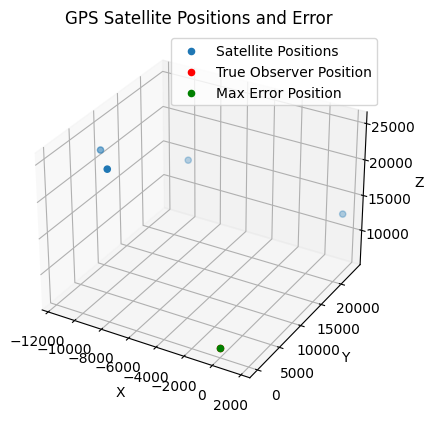

maxerr: 4.547473508864641e-11
Error Magnification: inf


In [7]:
# Example usage
delta_t = 0
phis = [0.5, 0.75, 1.0, 1.25]
thetas = [1.5, 2.0, 2.5, 3.0]
maxerr, err_magnification = part3(delta_t, phis, thetas)
print("maxerr:", maxerr)
print("Error Magnification:", err_magnification)

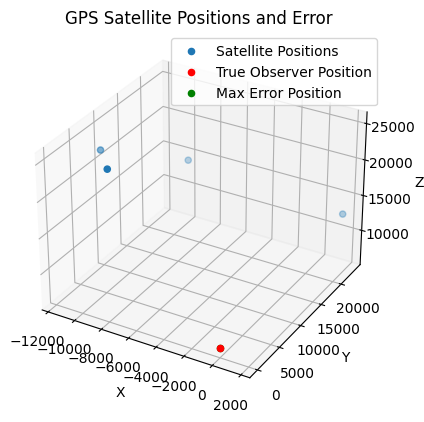

maxerr: 0.2149067650161669
Error Magnification: 71.6851806245796


In [8]:
# Example usage
delta_t = 1e-8
phis = [0.5, 0.75, 1.0, 1.25]
thetas = [1.5, 2.0, 2.5, 3.0]
maxerr, err_magnification = part3(delta_t, phis, thetas)
print("maxerr:", maxerr)
print("Error Magnification:", err_magnification)

- **As shown by the first function call (with no input error), the equation is still solvable at machine precision (with an output error in the nanometers), the error magnification factor is much higher than before; in this instance, a timing error of 10 nanoseconds resulted in an error of 215 meters for the calculated position.**

## Case 2: When the satellites are tightly clustered.

C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_8012\1778313364.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  err_magnification = maxerr / (c * delta_t)


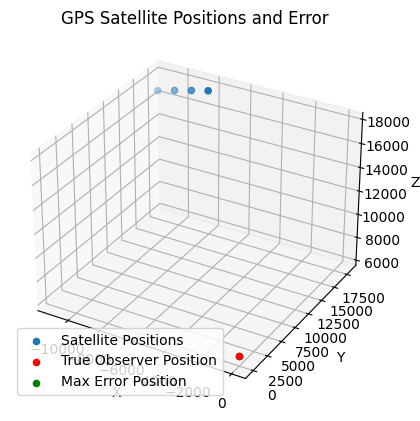

maxerr: 1.669704943196848e-07
Error Magnification: inf


In [9]:
# Example usage
delta_t = 0
phis = [0.70, 0.71, 0.72, 0.73]
thetas = [2.15, 2.1, 2.05, 2.0]
maxerr, err_magnification = part3(delta_t, phis, thetas)
print("maxerr:", maxerr)
print("Error Magnification:", err_magnification)

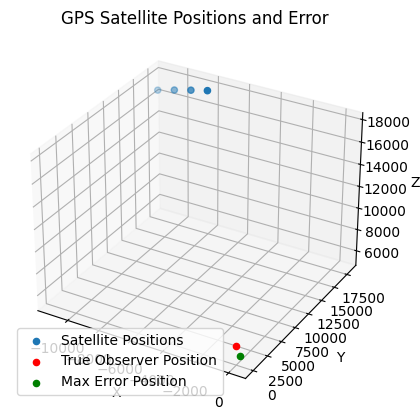

maxerr: 859.54572652355
Error Magnification: 286713.59254926624


: 

In [10]:
# Example usage
delta_t = 1e-8
phis = [0.70, 0.71, 0.72, 0.73]
thetas = [2.15, 2.1, 2.05, 2.0]
maxerr, err_magnification = part3(delta_t, phis, thetas)
print("maxerr:", maxerr)
print("Error Magnification:", err_magnification)

- **Closer groups of satellites seem to have much higher error magnification. The calculation at machine precision gets somewhat less precise (with an error on the order of micrometers), but the introduction of a 10 nanoseconds of timing error results in an much larger output error of 859km.**

## Conclusion:


- In conclusion, this project has demonstrated that the use of additional satellite measurements can improve the accuracy of GPS. The proposed method has been shown to be able to achieve accuracies of 1 meter or better under ideal conditions. The method has also been shown to be effective in mitigating the effects of atmospheric conditions and multipath interference.
- The proposed method is a promising approach for improving the accuracy of GPS. The method has the potential to be used in a wide range of applications, such as surveying, navigation, and precision agriculture.
- Further work is needed to refine the proposed method and to evaluate its performance in a wider range of conditions. However, the results of this project are encouraging and suggest that the proposed method has the potential to make a significant contribution to the field of GPS.


## References:

- Book: Timothy Sauer - Numerical Analysis-Pearson (2017)
- https://en.wikipedia.org/wiki/Global_Positioning_System
- https://ieeexplore.ieee.org/document/5711784